In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class BanditArm():
    def __init__(self , m):
        self.m = m
        self.m_estimate = 0
        self.N = 0
    
    # randomly generating real values with mean m
    def pull(self):
        return np.random.randn() + self.m
    
    # updating the running mean
    # Xn = ((N - 1)Xn-1 + X)/N
    # where Xn-1 - previous mean , Xn - current mean , X - current data
    def update(self , x):
        self.N += 1
        self.m_estimate = ((self.N - 1)*self.m_estimate + x)/self.N

In [ ]:
NUM_TRAILS = 50000
Bandit_probabilities = [0.2 , 0.35 , 0.6]
eps = [0.1 , 0.05 , 0.01]

In [ ]:
def experiment(EPS):
    rewards = []
    Num_explored = 0
    Num_exploited = 0
    num_optimal = 0

    optimal_j = np.argmax(Bandit_probabilities)

    bandits = [BanditArm(b) for b in Bandit_probabilities]

    for i in range(NUM_TRAILS):
        
        if np.random.random() < EPS:
            j = np.random.randint(len(bandits))
            Num_explored +=1

        else:
            j = np.argmax([b.m_estimate for b in bandits])
            Num_exploited += 1
        
        if optimal_j == j:
            num_optimal += 1

        x = bandits[j].pull()
        rewards.append(x)
        bandits[j].update(x)
    
    print(f"------------------ EPSILON - {EPS} ------------------------------ ")

    for b in bandits:
        print("Mean Estimate ", b.m_estimate)

    print("Total reward Earned " , sum(rewards))
    print("Overall win rate " , sum(rewards)/len(rewards))
    print("Number of times optimal bandit Selected ", num_optimal)
    print("Number of times explored " , Num_explored)
    print("Number of times exploited " , Num_exploited)

    #plot the results
    cumsum = np.cumsum(rewards)
    winrates = cumsum / (np.arange(NUM_TRAILS) + 1)
    plt.plot(winrates)
    plt.plot(np.ones(NUM_TRAILS)*Bandit_probabilities[0])
    plt.plot(np.ones(NUM_TRAILS)*Bandit_probabilities[1])
    plt.plot(np.ones(NUM_TRAILS)*Bandit_probabilities[2])
    plt.xscale("log")
    plt.xlabel("Log Scale Iterations")
    plt.ylabel("Winrates")
    plt.show()

    return winrates

##Experimenting with different epsilon values

------------------ EPSILON - 0.1 ------------------------------ 
Mean Estimate  0.20773695721411173
Mean Estimate  0.3305827327036402
Mean Estimate  0.5981140076290646
Total reward Earned  28801.672884928637
Overall win rate  0.5760334576985727
Number of times optimal bandit Selected  46647
Number of times explored  5010
Number of times exploited  44990


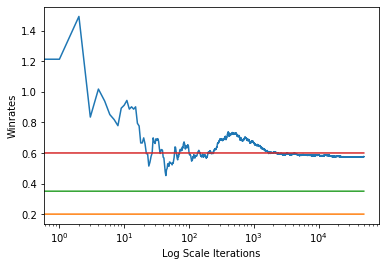

------------------ EPSILON - 0.05 ------------------------------ 
Mean Estimate  0.21159480135090014
Mean Estimate  0.33371985602105525
Mean Estimate  0.6072386006949275
Total reward Earned  29765.84853513444
Overall win rate  0.5953169707026887
Number of times optimal bandit Selected  48202
Number of times explored  2491
Number of times exploited  47509


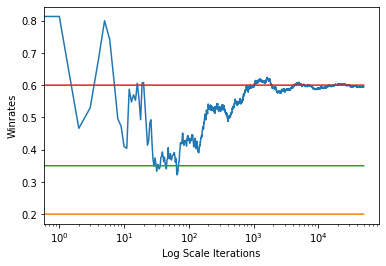

------------------ EPSILON - 0.01 ------------------------------ 
Mean Estimate  0.35441289136182763
Mean Estimate  0.2847667876413133
Mean Estimate  0.5891966473060269
Total reward Earned  29371.548514779603
Overall win rate  0.5874309702955921
Number of times optimal bandit Selected  49675
Number of times explored  491
Number of times exploited  49509


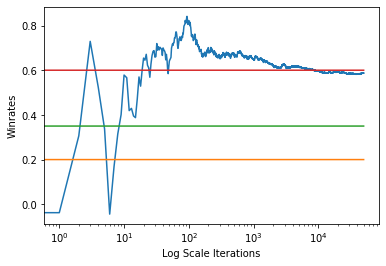

In [ ]:
winrates = []
for EPS in eps:
    winrates.append(experiment(EPS))

## Plotting All the three plots together to see the time it took reach the optimal Bandit

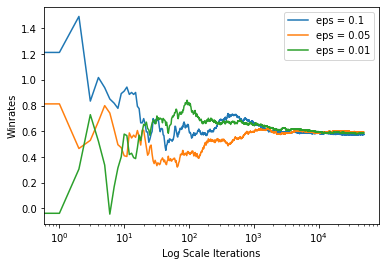

In [ ]:
plt.plot(winrates[0] , label = f"eps = {eps[0]}")
plt.plot(winrates[1] , label = f"eps = {eps[1]}")
plt.plot(winrates[2] , label = f"eps = {eps[2]}")
plt.xscale("log")
plt.xlabel("Log Scale Iterations")
plt.ylabel("Winrates")
plt.legend()
plt.show()

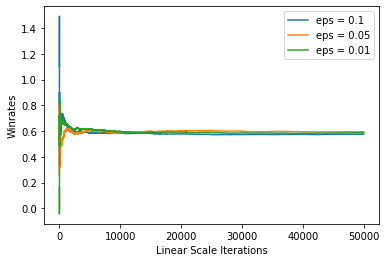

In [ ]:
plt.plot(winrates[0] , label = f"eps = {eps[0]}")
plt.plot(winrates[1] , label = f"eps = {eps[1]}")
plt.plot(winrates[2] , label = f"eps = {eps[2]}")
plt.xlabel("Linear Scale Iterations")
plt.ylabel("Winrates")
plt.legend()
plt.show()

##Conclusion:
###The Mean Estimates of each bandits are close to their true mean
###From the graph, we can see that winrates converges to the maximum winrate after certain period.
###If we use low epsilon value then we reached estimated mean very closer to true mean, but it longer time to converge than high epsilon values.
###So there is a trade-off between time-to-converge and closer to optimality.